In [ ]:
!pip install -U imbalanced-learn

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os
import PIL
import cv2
import time
import shutil
import random
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import RandomOverSampler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Lambda,Flatten

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#img_height, img_width = 224, 224
img_height, img_width = 456, 456
batch_size = 32


data_dir = '/content/drive/My Drive/Data_training/train_75/dataset_MIX'
val_dir = '/content/drive/My Drive/Data_training/val_25/val_MIX'



train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed=123
)

class_names = train_ds.class_names
class_counts_dir = Counter()

train_ds_unbatched = train_ds.unbatch()

Found 13320 files belonging to 3 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['HCS', 'LCS', 'MCS']


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
class_names = val_ds.class_names

class_counts_val = Counter()

val_ds_unbatched = val_ds.unbatch()


Found 4296 files belonging to 3 classes.


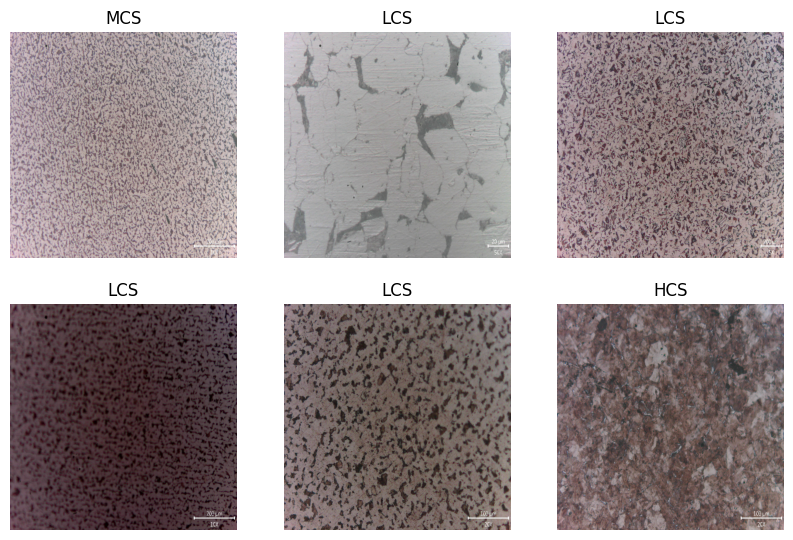

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model


input_tensor = Input(shape=(456, 456, 3), name='input_layer_1')


pretrained_model = tf.keras.applications.DenseNet121(
    include_top=False,
    weights='imagenet',
    input_tensor=input_tensor,
    pooling='avg'
)


pretrained_model.trainable = False


x = pretrained_model.output
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
output_tensor = Dense(3, activation='softmax')(x)


densenet_model = Model(inputs=pretrained_model.input, outputs=output_tensor)


densenet_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


densenet_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 456, 456, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 462, 462, 3)    │              0 │ input_layer_1[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 228, 228, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 228, 228, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 228, 228, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 230, 230, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 114, 114, 64)   │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 114, 114, 64)   │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 114, 114, 64)   │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 114, 114, 128)  │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 114, 114, 128)  │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 114, 114, 128)  │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 114, 114, 32)   │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 114, 114, 96)   │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 8,613,443 (32.86 MB)

 Trainable params: 1,575,939 (6.01 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
densenet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


history = densenet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    verbose=1
)

Epoch 1/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 880s 2s/step - accuracy: 0.6638 - loss: 0.8553 - val_accuracy: 0.8634 - val_loss: 0.3180
Epoch 2/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 823s 2s/step - accuracy: 0.8602 - loss: 0.3458 - val_accuracy: 0.8932 - val_loss: 0.2553
Epoch 3/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 804s 2s/step - accuracy: 0.9045 - loss: 0.2425 - val_accuracy: 0.9223 - val_loss: 0.1974
Epoch 4/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 781s 2s/step - accuracy: 0.9260 - loss: 0.1902 - val_accuracy: 0.9372 - val_loss: 0.1641
Epoch 5/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 804s 2s/step - accuracy: 0.9401 - loss: 0.1574 - val_accuracy: 0.9434 - val_loss: 0.1488
Epoch 6/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 933s 2s/step - accuracy: 0.9554 - loss: 0.1272 - val_accuracy: 0.9416 - val_loss: 0.1533
Epoch 7/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 770s 2s/step - accuracy: 0.9605 - loss: 0.1087 - val_accuracy: 0.9551 - val_loss: 0.1261
Epoch 8/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 754s 2s/step - accuracy: 0.9705 - loss: 0.0870 - val_accu

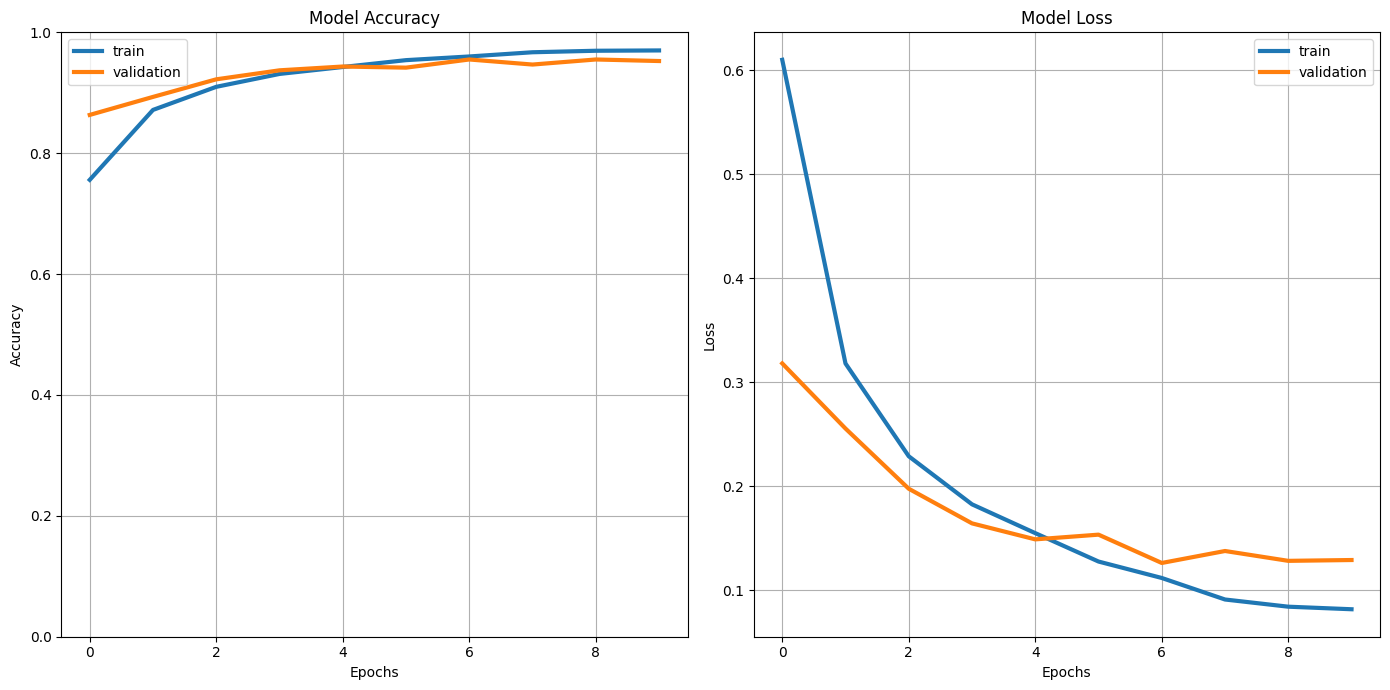

In [ ]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'],linewidth=3)
plt.plot(history.history['val_accuracy'],linewidth=3)
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])

plt.subplot(1, 2, 2)
fig2 = plt.gcf()
plt.plot(history.history['loss'],linewidth=3)
plt.plot(history.history['val_loss'],linewidth=3)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])


plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

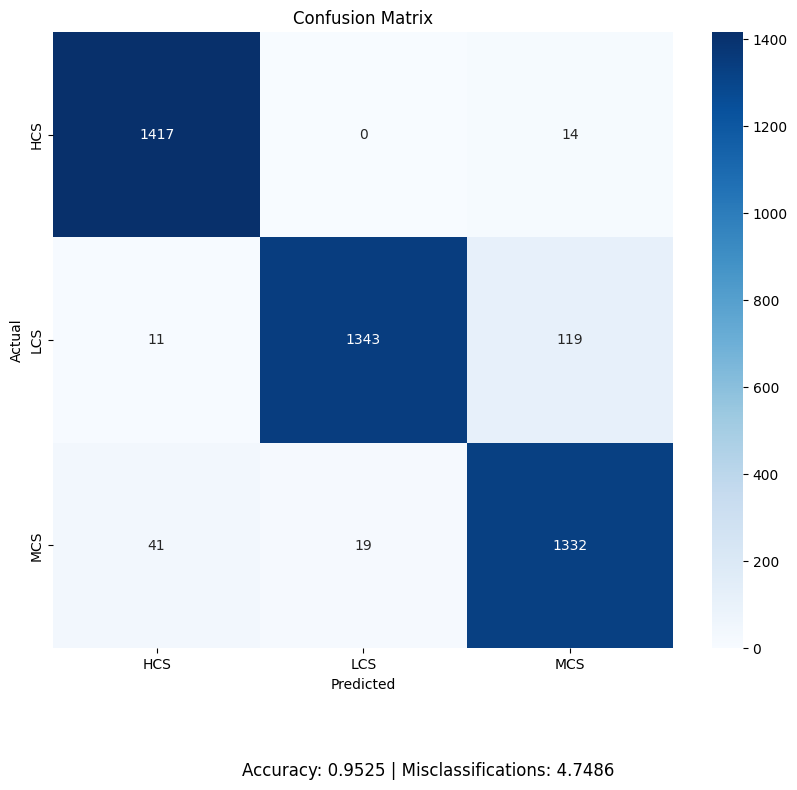

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

true_labels_densenet = []
predicted_labels_densenet = []


for images, labels in val_ds:
    predictions = densenet_model.predict(images)
    predicted_labels_densenet.extend(np.argmax(predictions, axis=1))
    true_labels_densenet.extend(labels.numpy())


true_labels_densenet = np.array(true_labels_densenet)
predicted_labels_densenet = np.array(predicted_labels_densenet)


conf_matrix = confusion_matrix(true_labels_densenet, predicted_labels_densenet)


accuracy = accuracy_score(true_labels_densenet, predicted_labels_densenet)


misclassifications = np.sum(true_labels_densenet != predicted_labels_densenet)
misclass_percentage = (misclassifications / len(true_labels_densenet)) * 100


plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')


plt.figtext(0.5, -0.05, f'Accuracy: {accuracy:.4f} | Misclassifications: {misclass_percentage:.4f}',
            horizontalalignment='center', fontsize=12, color='black')

plt.show()

In [ ]:
densenet_model.save('/content/drive/My Drive/THESIS S2/Comparasion/model_densenet121_MIX_75.h5')

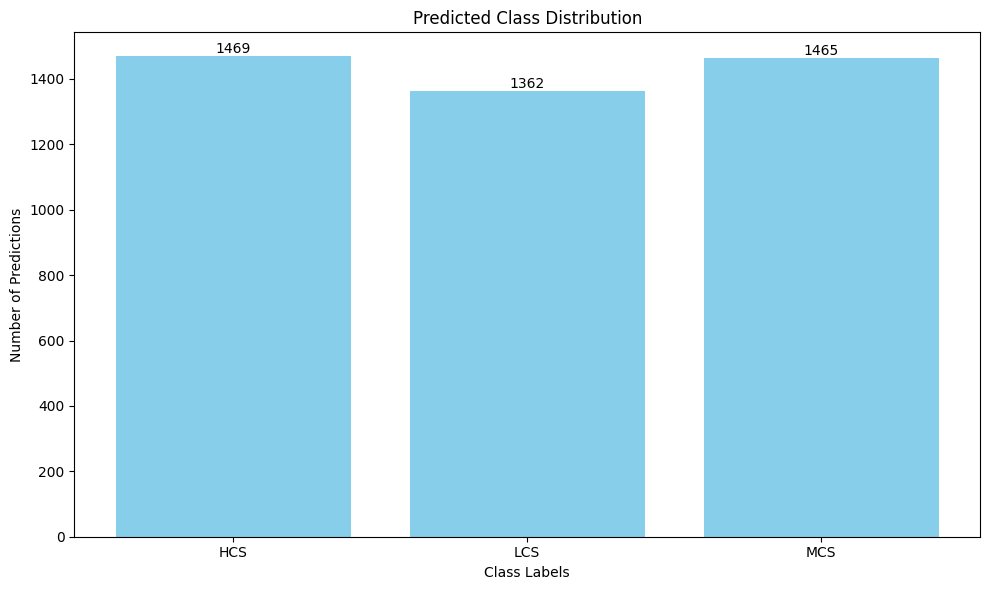

In [ ]:

plt.figure(figsize=(10, 6))


predicted_class_counts_densenet = np.bincount(predicted_labels_densenet)


bars = plt.bar(range(len(predicted_class_counts_densenet)), predicted_class_counts_densenet, tick_label=class_names, color='skyblue')


plt.title('Predicted Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Number of Predictions')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')


plt.tight_layout()
plt.show()

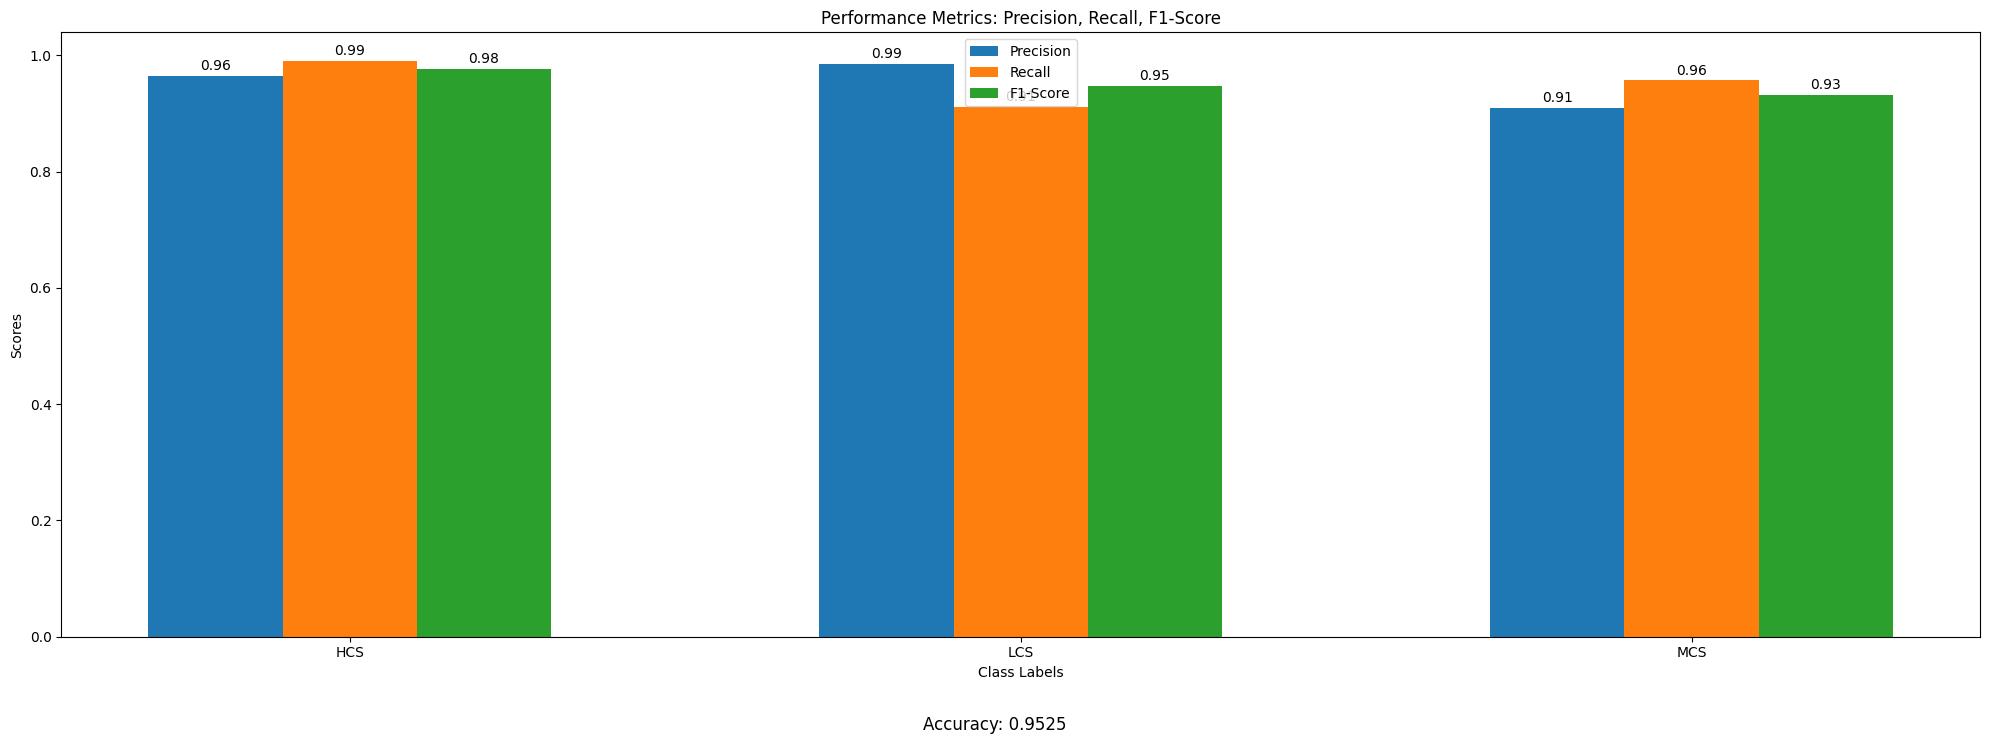

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


precision, recall, f1, _ = precision_recall_fscore_support(true_labels_densenet, predicted_labels_densenet)


accuracy = accuracy_score(true_labels_densenet, predicted_labels_densenet)


x = np.arange(len(class_names))
width = 0.2

plt.figure(figsize=(20, 7))


plt.bar(x - width, precision, width, label='Precision')
for i, v in enumerate(precision):
    plt.text(i - width, v + 0.01, f"{v:.2f}", ha='center')


plt.bar(x, recall, width, label='Recall')
for i, v in enumerate(recall):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')


plt.bar(x + width, f1, width, label='F1-Score')
for i, v in enumerate(f1):
    plt.text(i + width, v + 0.01, f"{v:.2f}", ha='center')


plt.xlabel('Class Labels')
plt.ylabel('Scores')
plt.title('Performance Metrics: Precision, Recall, F1-Score')


plt.figtext(0.5, -0.05, f'Accuracy: {accuracy:.4f}', ha='center', fontsize=12, color='black')

plt.xticks(x, class_names)
plt.legend()

plt.tight_layout()
plt.show()

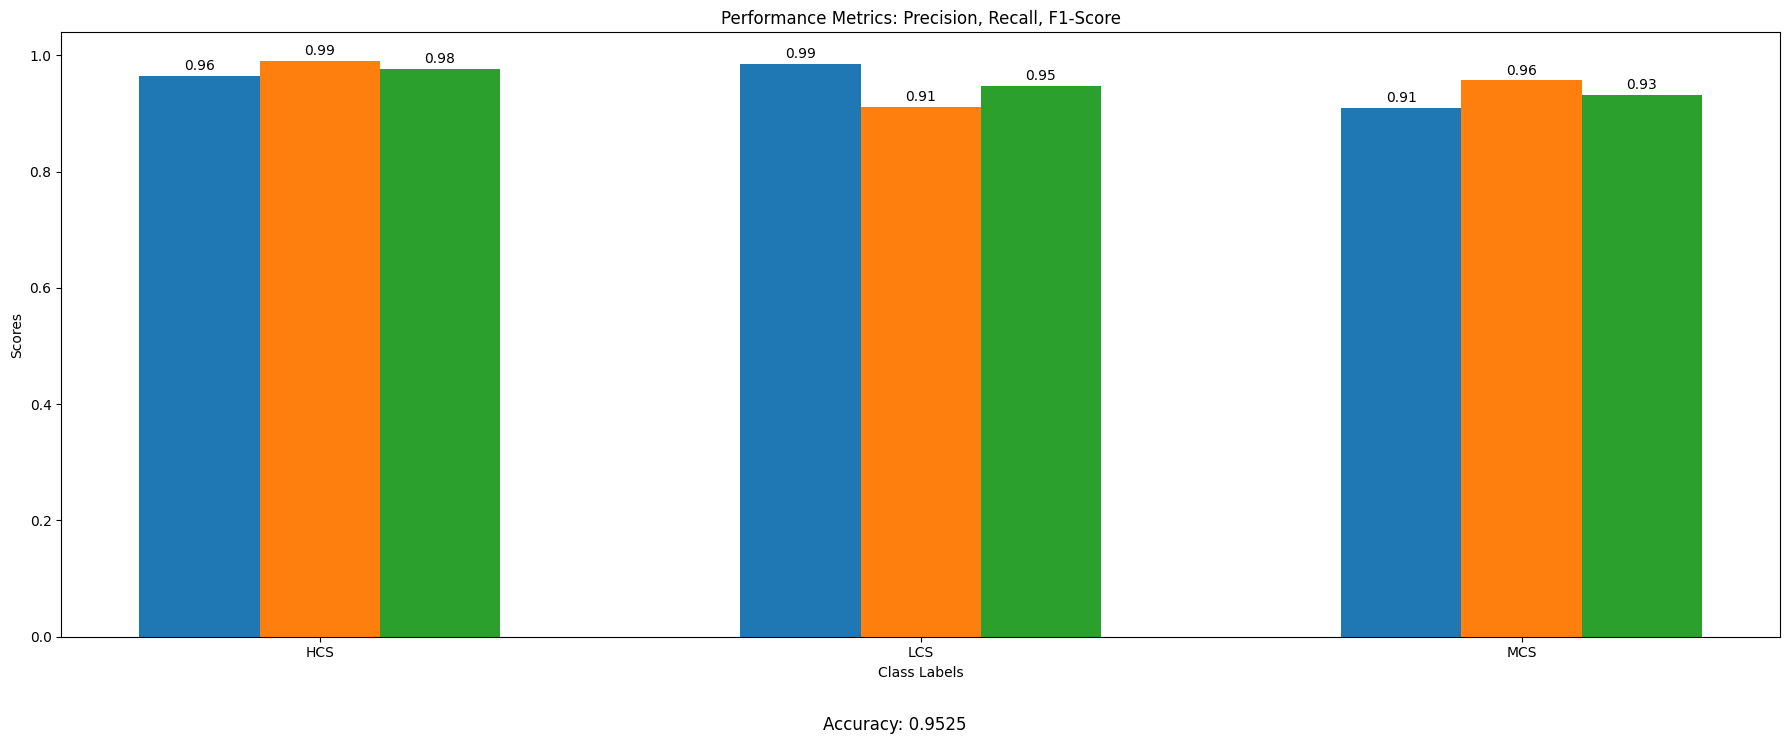

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


precision, recall, f1, _ = precision_recall_fscore_support(true_labels_densenet, predicted_labels_densenet)


accuracy = accuracy_score(true_labels_densenet, predicted_labels_densenet)


x = np.arange(len(class_names))
width = 0.2

plt.figure(figsize=(18, 7))


plt.bar(x - width, precision, width, label='Precision')
for i, v in enumerate(precision):
    plt.text(i - width, v + 0.01, f"{v:.2f}", ha='center')


plt.bar(x, recall, width, label='Recall')
for i, v in enumerate(recall):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')


plt.bar(x + width, f1, width, label='F1-Score')
for i, v in enumerate(f1):
    plt.text(i + width, v + 0.01, f"{v:.2f}", ha='center')


plt.xlabel('Class Labels')
plt.ylabel('Scores')
plt.title('Performance Metrics: Precision, Recall, F1-Score')


plt.figtext(0.5, -0.05, f'Accuracy: {accuracy:.4f}', ha='center', fontsize=12, color='black')

plt.xticks(x, class_names)

plt.tight_layout()
plt.show()

# **VGGNET-19**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG19


input_tensor = Input(shape=(456, 456, 3), name='input_layer_1')


pretrained_model = VGG19(
    include_top=False,
    weights='imagenet',
    input_tensor=input_tensor,
    pooling=None
)


pretrained_model.trainable = False


x = pretrained_model.output
x = Flatten()(x)

x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
output_tensor = Dense(3, activation='softmax')(x)


vgg_model = Model(inputs=pretrained_model.input, outputs=output_tensor)


vgg_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


vgg_model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 456, 456, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 456, 456, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 456, 456, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 228, 228, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 228, 228, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 228, 228, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 114, 114, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 114, 114, 256)       │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 114, 114, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 114, 114, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 114, 114, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 57, 57, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 57, 57, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 57, 57, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 57, 57, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 57, 57, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 28, 28, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 123,312,195 (470.40 MB)

 Trainable params: 103,287,811 (394.01 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
vgg_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Assuming train_ds and val_ds are already defined and using sparse labels
history_vgg = vgg_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    verbose=1
)

Epoch 1/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 941s 2s/step - accuracy: 0.8343 - loss: 0.9167 - val_accuracy: 0.9416 - val_loss: 0.1675
Epoch 2/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 928s 2s/step - accuracy: 0.9794 - loss: 0.0654 - val_accuracy: 0.9602 - val_loss: 0.1511
Epoch 3/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 862s 2s/step - accuracy: 0.9867 - loss: 0.0377 - val_accuracy: 0.9756 - val_loss: 0.1135
Epoch 4/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 838s 2s/step - accuracy: 0.9907 - loss: 0.0312 - val_accuracy: 0.9746 - val_loss: 0.1059
Epoch 5/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 885s 2s/step - accuracy: 0.9882 - loss: 0.0447 - val_accuracy: 0.9325 - val_loss: 0.5104
Epoch 6/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 833s 2s/step - accuracy: 0.9898 - loss: 0.0474 - val_accuracy: 0.9667 - val_loss: 0.1917
Epoch 7/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 850s 2s/step - accuracy: 0.9945 - loss: 0.0221 - val_accuracy: 0.9795 - val_loss: 0.1474
Epoch 8/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 927s 2s/step - accuracy: 0.9969 - loss: 0.0135 - val_accu

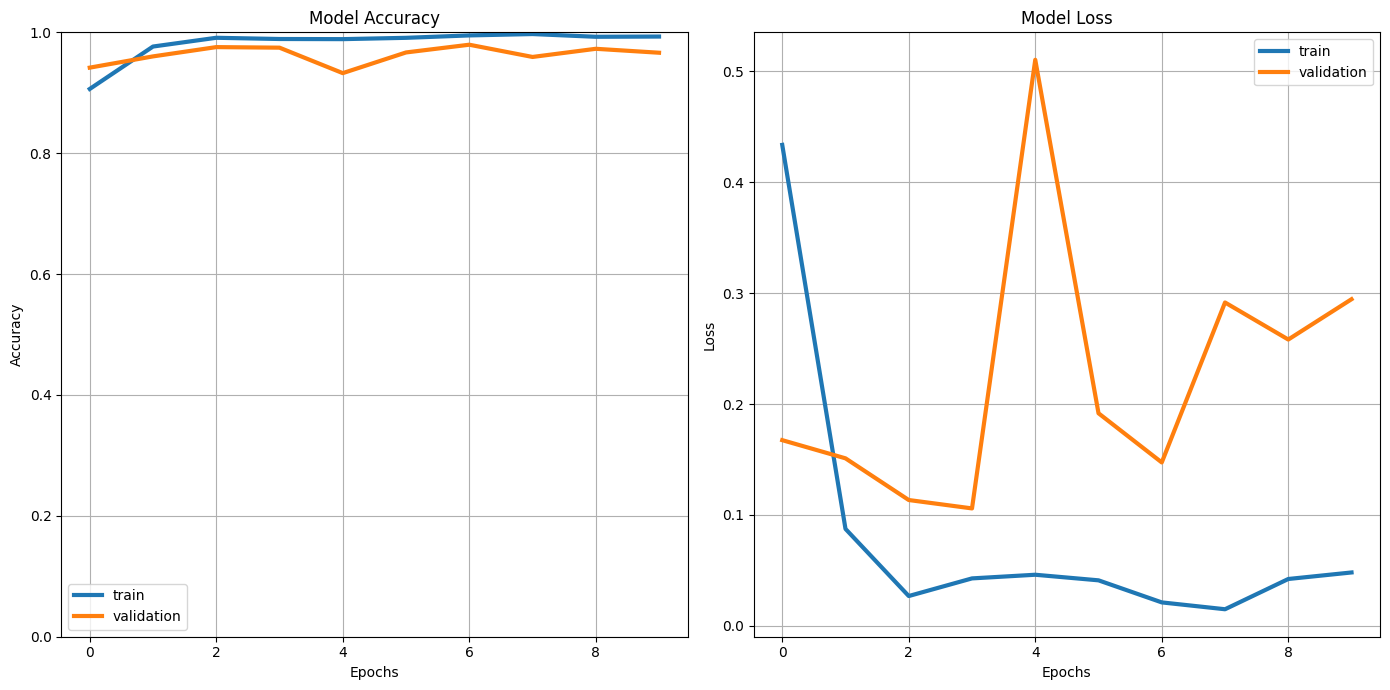

In [ ]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'],linewidth=3)
plt.plot(history_vgg.history['val_accuracy'],linewidth=3)
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])

plt.subplot(1, 2, 2)
fig2 = plt.gcf()
plt.plot(history_vgg.history['loss'],linewidth=3)
plt.plot(history_vgg.history['val_loss'],linewidth=3)
plt.grid()
plt.title('Model LossA')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])


plt.tight_layout()
plt.show()

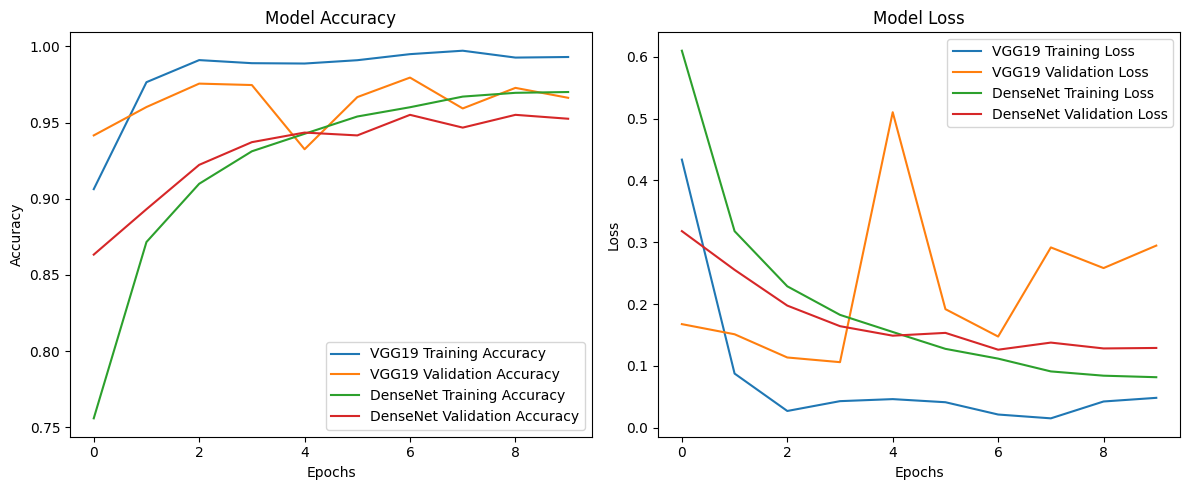

In [ ]:

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'], label='VGG19 Training Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='VGG19 Validation Accuracy')
plt.plot(history.history['accuracy'], label='DenseNet Training Accuracy')
plt.plot(history.history['val_accuracy'], label='DenseNet Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'], label='VGG19 Training Loss')
plt.plot(history_vgg.history['val_loss'], label='VGG19 Validation Loss')
plt.plot(history.history['loss'], label='DenseNet Training Loss')
plt.plot(history.history['val_loss'], label='DenseNet Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()
plt.show()

In [ ]:
vgg_model.save('/content/drive/My Drive/THESIS S2/Comparasion/model_vggnet19_MIX_75.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

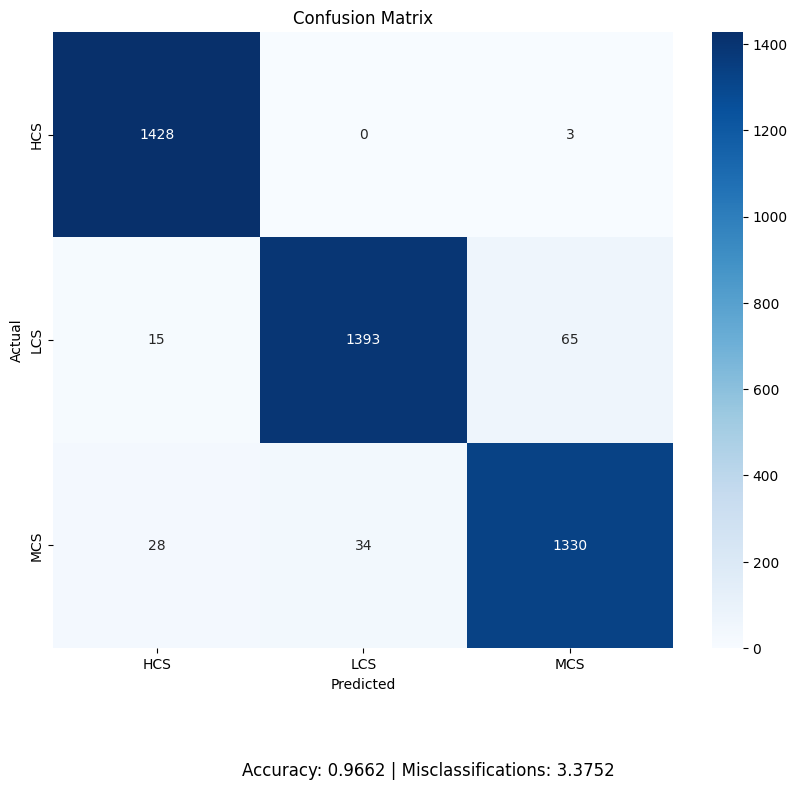

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

true_labels_vggnet = []
predicted_labels_vggnet = []


for images, labels in val_ds:
    predictions = vgg_model.predict(images)
    predicted_labels_vggnet.extend(np.argmax(predictions, axis=1))
    true_labels_vggnet.extend(labels.numpy())


true_labels_vggnet = np.array(true_labels_vggnet)
predicted_labels_vggnet = np.array(predicted_labels_vggnet)

conf_matrix = confusion_matrix(true_labels_vggnet, predicted_labels_vggnet)


accuracy = accuracy_score(true_labels_vggnet, predicted_labels_vggnet)


misclassifications = np.sum(true_labels_vggnet != predicted_labels_vggnet)
misclass_percentage = (misclassifications / len(true_labels_vggnet)) * 100


plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')


plt.figtext(0.5, -0.05, f'Accuracy: {accuracy:.4f} | Misclassifications: {misclass_percentage:.4f}',
            horizontalalignment='center', fontsize=12, color='black')

plt.show()

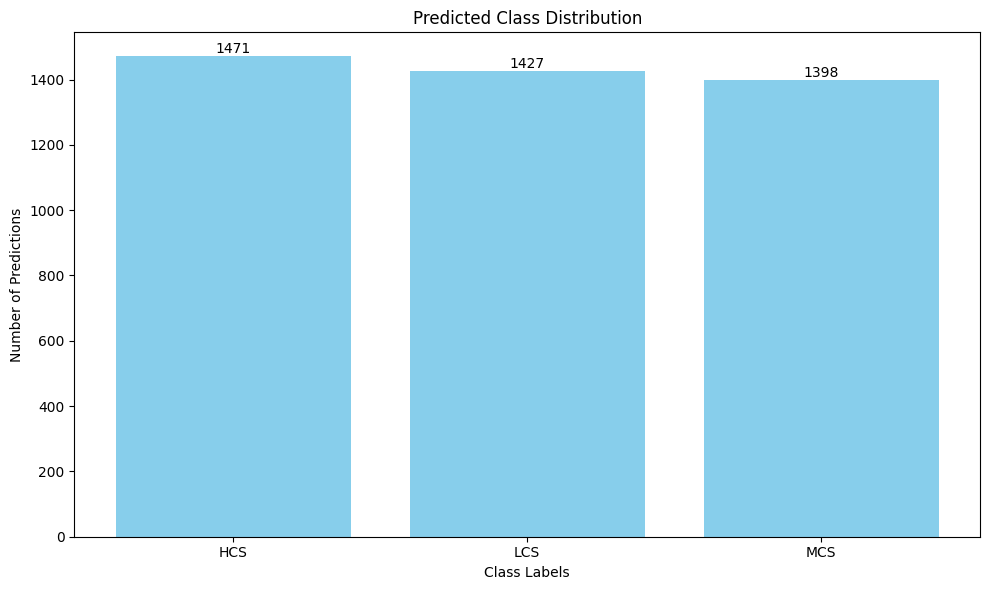

In [ ]:

plt.figure(figsize=(10, 6))


predicted_class_counts = np.bincount(predicted_labels)


bars = plt.bar(range(len(predicted_class_counts)), predicted_class_counts, tick_label=class_names, color='skyblue')


plt.title('Predicted Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Number of Predictions')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')


plt.tight_layout()
plt.show()

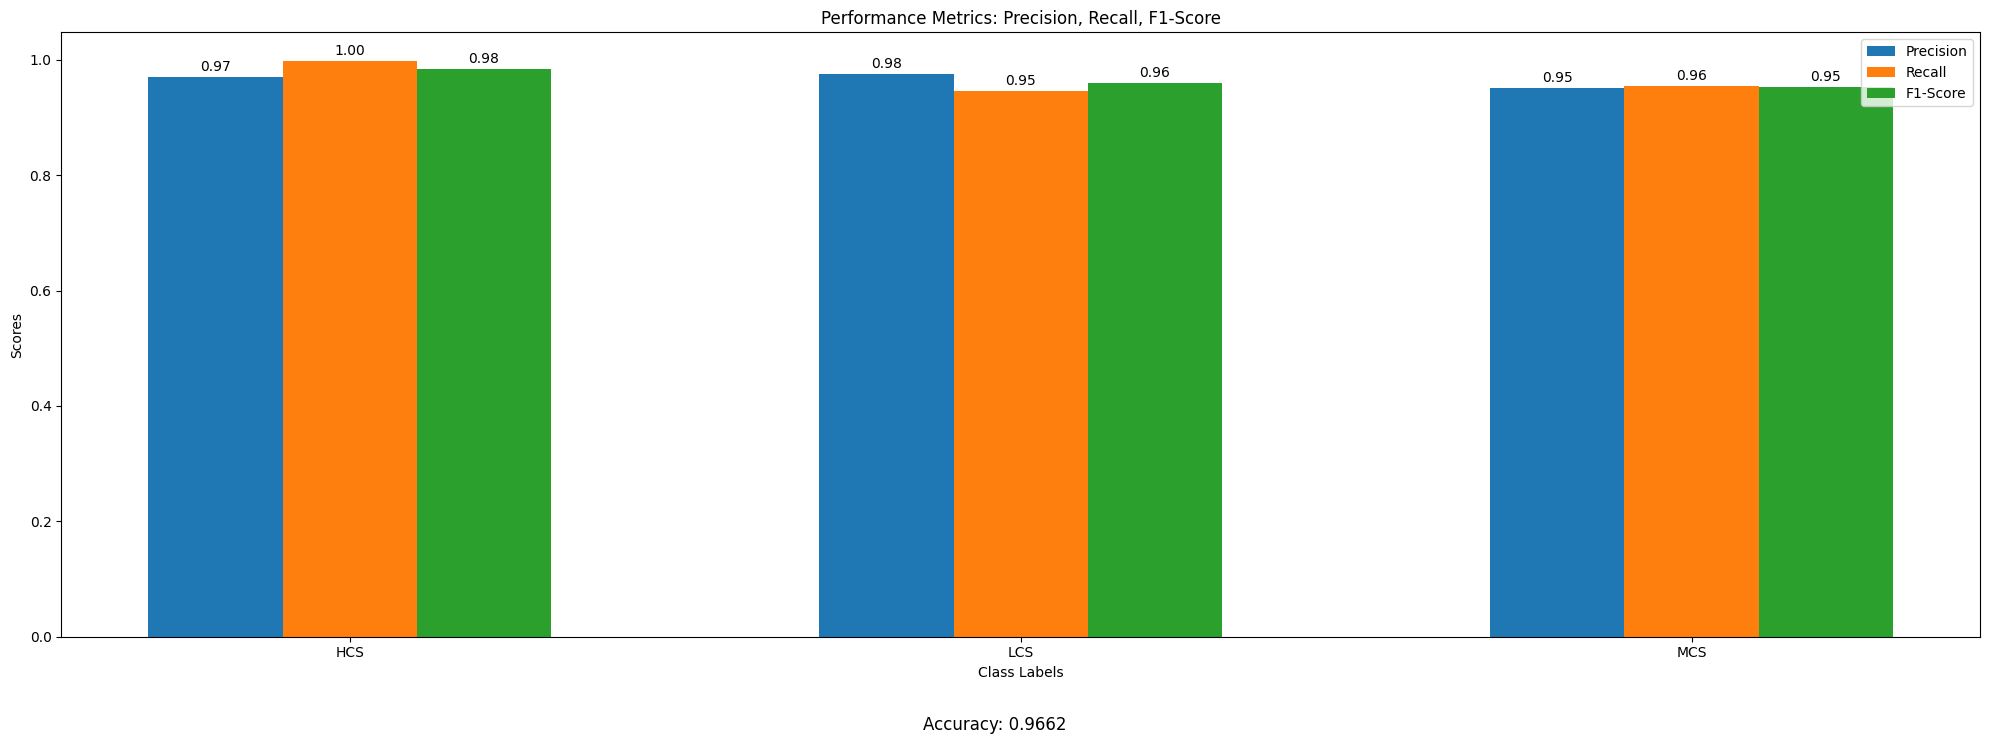

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


precision, recall, f1, _ = precision_recall_fscore_support(true_labels_vggnet, predicted_labels_vggnet)


accuracy = accuracy_score(true_labels_vggnet, predicted_labels_vggnet)


x = np.arange(len(class_names))
width = 0.2

plt.figure(figsize=(20, 7))


plt.bar(x - width, precision, width, label='Precision')
for i, v in enumerate(precision):
    plt.text(i - width, v + 0.01, f"{v:.2f}", ha='center')


plt.bar(x, recall, width, label='Recall')
for i, v in enumerate(recall):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')


plt.bar(x + width, f1, width, label='F1-Score')
for i, v in enumerate(f1):
    plt.text(i + width, v + 0.01, f"{v:.2f}", ha='center')


plt.xlabel('Class Labels')
plt.ylabel('Scores')
plt.title('Performance Metrics: Precision, Recall, F1-Score')


plt.figtext(0.5, -0.05, f'Accuracy: {accuracy:.4f}', ha='center', fontsize=12, color='black')

plt.xticks(x, class_names)
plt.legend()

plt.tight_layout()
plt.show()

# **RESNET50**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
resnet_model = Sequential()
input_tensor = Input(shape=(456, 456, 3), name='input_layer_1')
pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=input_tensor,
    pooling='avg'
)
pretrained_model.trainable = False
x = pretrained_model.output
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
output_tensor = Dense(3, activation='softmax')(x)

resnet_model = Model(inputs=pretrained_model.input, outputs=output_tensor)

resnet_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

resnet_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 456, 456, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 462, 462, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 228, 228, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 228, 228, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 228, 228, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 230, 230, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 114, 114, 64)   │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 114, 114, 64)   │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 114, 114, 64)   │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 114, 114, 64)   │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 114, 114, 64)   │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 114, 114, 64)   │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 114, 114, 64)   │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 114, 114, 256)  │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 114, 114, 256)  │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 26,212,227 (99.99 MB)

 Trainable params: 2,624,515 (10.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
resnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


history_resnet = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    verbose=1
)

Epoch 1/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 836s 2s/step - accuracy: 0.9518 - loss: 0.1230 - val_accuracy: 0.9688 - val_loss: 0.0823
Epoch 2/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 867s 2s/step - accuracy: 0.9710 - loss: 0.0804 - val_accuracy: 0.9779 - val_loss: 0.0606
Epoch 3/10
 46/417 ━━━━━━━━━━━━━━━━━━━━ 8:38 1s/step - accuracy: 0.9807 - loss: 0.0551

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'],linewidth=3)
plt.plot(history_resnet.history['val_accuracy'],linewidth=3)
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Accuracy Resnet50')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])

plt.subplot(1, 2, 2)
fig2 = plt.gcf()
plt.plot(history_resnet.history['loss'],linewidth=3)
plt.plot(history_resnet.history['val_loss'],linewidth=3)
plt.grid()
plt.title('Model Loss Resnet50')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])


plt.tight_layout()
plt.show()

In [ ]:
resnet_model.save('/content/drive/My Drive/THESIS S2/Comparasion/model_Resnet_MIX_75.h5')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

true_labels_resnet50 = []
predicted_labels_resnet50 = []


for images, labels in val_ds:
    predictions = resnet_model.predict(images)
    predicted_labels_resnet50.extend(np.argmax(predictions, axis=1))
    true_labels_resnet50.extend(labels.numpy())


true_labels_resnet50 = np.array(true_labels_resnet50)
predicted_labels_resnet50 = np.array(predicted_labels_resnet50)


conf_matrix = confusion_matrix(true_labels_resnet50, predicted_labels_resnet50)


accuracy = accuracy_score(true_labels_resnet50, predicted_labels_resnet50)


misclassifications = np.sum(true_labels_resnet50 != predicted_labels_resnet50)
misclass_percentage = (misclassifications / len(true_labels_resnet50)) * 100


plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')


plt.figtext(0.5, -0.05, f'Accuracy: {accuracy:.4f} | Misclassifications: {misclass_percentage:.4f}',
            horizontalalignment='center', fontsize=12, color='black')

plt.show()

In [ ]:

plt.figure(figsize=(10, 6))


predicted_class_counts_resnet = np.bincount(predicted_labels_resnet50)


bars = plt.bar(range(len(predicted_class_counts_resnet)), predicted_class_counts_resnet, tick_label=class_names, color='skyblue')


plt.title('Predicted Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Number of Predictions')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')


plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


precision, recall, f1, _ = precision_recall_fscore_support(true_labels_resnet50, predicted_labels_resnet50)


accuracy = accuracy_score(true_labels_resnet50, predicted_labels_resnet50)


x = np.arange(len(class_names))
width = 0.2

plt.figure(figsize=(20, 7))


plt.bar(x - width, precision, width, label='Precision')
for i, v in enumerate(precision):
    plt.text(i - width, v + 0.01, f"{v:.2f}", ha='center')


plt.bar(x, recall, width, label='Recall')
for i, v in enumerate(recall):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')


plt.bar(x + width, f1, width, label='F1-Score')
for i, v in enumerate(f1):
    plt.text(i + width, v + 0.01, f"{v:.2f}", ha='center')


plt.xlabel('Class Labels')
plt.ylabel('Scores')
plt.title('Performance Metrics: Precision, Recall, F1-Score')


plt.figtext(0.5, -0.05, f'Accuracy: {accuracy:.4f}', ha='center', fontsize=12, color='black')

plt.xticks(x, class_names)
plt.legend()

plt.tight_layout()
plt.show()

# **EFNET-B5**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model


from tensorflow.keras.applications import EfficientNetB5

input_tensor = Input(shape=(456, 456, 3), name='input_layer_1')
pretrained_model = EfficientNetB5(
    include_top=False,
    weights='imagenet',
    input_tensor=input_tensor,
    pooling='avg'
)
pretrained_model.trainable = False


x = pretrained_model.output
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
output_tensor = Dense(3, activation='softmax')(x)


efficientnet_model = Model(inputs=pretrained_model.input, outputs=output_tensor)


efficientnet_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


efficientnet_model.summary()


In [ ]:

efficientnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


history_effnetB5 = efficientnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    verbose=1
)


In [ ]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history_effnetB5.history['accuracy'],linewidth=3)
plt.plot(history_effnetB5.history['val_accuracy'],linewidth=3)
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])

plt.subplot(1, 2, 2)
fig2 = plt.gcf()
plt.plot(history_effnetB5.history['loss'],linewidth=3)
plt.plot(history_effnetB5.history['val_loss'],linewidth=3)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])


plt.tight_layout()
plt.show()